In [4]:
import pandas as pd;
import numpy as np;
import seaborn as sns;
import matplotlib.pyplot as plt;


In [5]:
df=pd.read_csv('Netflix.csv')
df.describe()

,Release Year,Average Rating,Number of Reviews
count,82.000000,82.000000,82.000000
mean,2018.304878,7.547561,23146.341463
std,2.365853,1.097160,12796.722141
min,2006.000000,4.000000,8000.000000
25%,2017.250000,6.925000,13000.000000
50%,2019.000000,7.800000,19000.000000
75%,2020.000000,8.300000,31000.000000
max,2021.000000,9.400000,65000.000000


C:\Users\VIDYA\AppData\Local\Temp\ipykernel_35444\1523837587.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(top_words.values()), y=list(top_words.keys()), palette='mako')


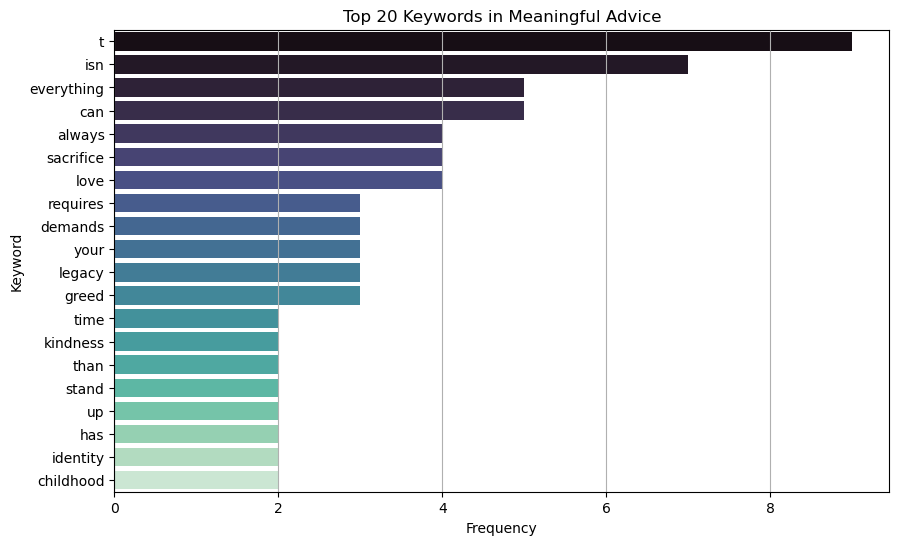

In [9]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

# Load your dataset
df = pd.read_csv("Netflix.csv")  # Adjust path if needed

# Combine the advice column into one string
text_data = ' '.join(df['Meaningful Advice Taken'].dropna())

# Basic text cleaning
words = re.findall(r'\b\w+\b', text_data.lower())
word_counts = Counter(words)

# Remove stopwords
stopwords = set(['the', 'and', 'to', 'of', 'in', 'a', 'for', 'is', 'on', 'with', 'that', 'be'])
filtered_words = {word: count for word, count in word_counts.items() if word not in stopwords}

# Get top 20 keywords
top_words = dict(sorted(filtered_words.items(), key=lambda x: x[1], reverse=True)[:20])

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=list(top_words.values()), y=list(top_words.keys()), palette='mako')
plt.title('Top 20 Keywords in Meaningful Advice')
plt.xlabel('Frequency')
plt.ylabel('Keyword')
plt.grid(axis='x')
plt.show()


In [3]:
from collections import Counter
import re

# Basic text cleaning
words = re.findall(r'\b\w+\b', text_data.lower())
word_counts = Counter(words)

# Remove common stopwords manually (optional)
stopwords = set(['the', 'and', 'to', 'of', 'in', 'a', 'for', 'is', 'on', 'with', 'that', 'be'])
filtered_words = {word: count for word, count in word_counts.items() if word not in stopwords}

# Take top 20
top_words = dict(sorted(filtered_words.items(), key=lambda x: x[1], reverse=True)[:20])

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=list(top_words.values()), y=list(top_words.keys()), palette='mako')
plt.title('Top 20 Keywords in Meaningful Advice')
plt.xlabel('Frequency')
plt.ylabel('Keyword')
plt.grid(axis='x')
plt.show()

NameError: name 'text_data' is not defined

In [11]:
df = pd.read_csv('Netflix.csv')

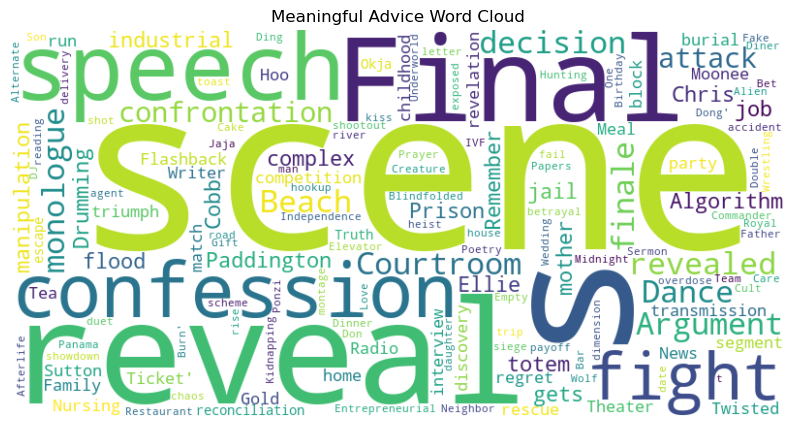

In [16]:
# Combine all advice into one big text
text_data = ' '.join(df['Minute of Life-Changing Insight'].dropna())

# Generate Word Cloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(text_data)

# Display Word Cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Meaningful Advice Word Cloud')
plt.show()


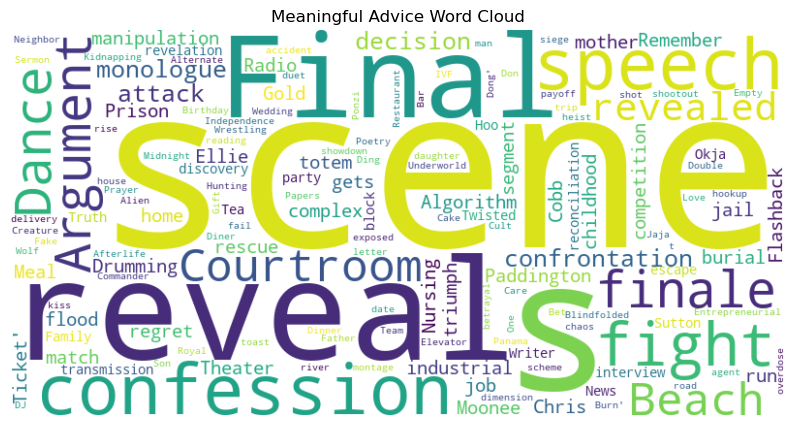

In [15]:
from wordcloud import WordCloud
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
#file_path = '/mnt/data/Netflix Life Impact Dataset (NLID).csv'
#df = pd.read_csv(file_path)

# Combine all advice into one big text
text_data = ' '.join(df['Minute of Life-Changing Insight'].dropna())

# Generate a Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(text_data)

# Display the Word Cloud
plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Meaningful Advice Word Cloud')
plt.show()

In [10]:
import sys
!{sys.executable} -m pip install wordcloud


Defaulting to user installation because normal site-packages is not writeable


In [7]:
from Wordcloud import WordCloud # type: ignore
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
#file_path = '/mnt/data/Netflix Life Impact Dataset (NLID).csv'
#df = pd.read_csv(file_path)

# Combine all advice into one big text
text_data = ' '.join(df['Minute of Life-Changing Insight'].dropna())

# Generate a Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(text_data)

# Display the Word Cloud
plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Meaningful Advice Word Cloud')
plt.show()

ModuleNotFoundError: No module named 'Wordcloud'

<Axes: ylabel='Movie Title'>

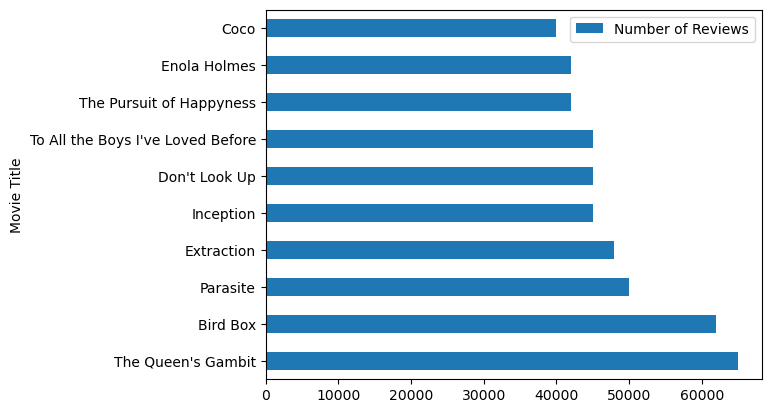

In [ ]:
df.nlargest(10, 'Number of Reviews').plot(x='Movie Title', y='Number of Reviews', kind='barh')


C:\Users\VIDYA\AppData\Local\Temp\ipykernel_31668\3702117454.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=life_change_counts.values, y=life_change_counts.index, palette="viridis")


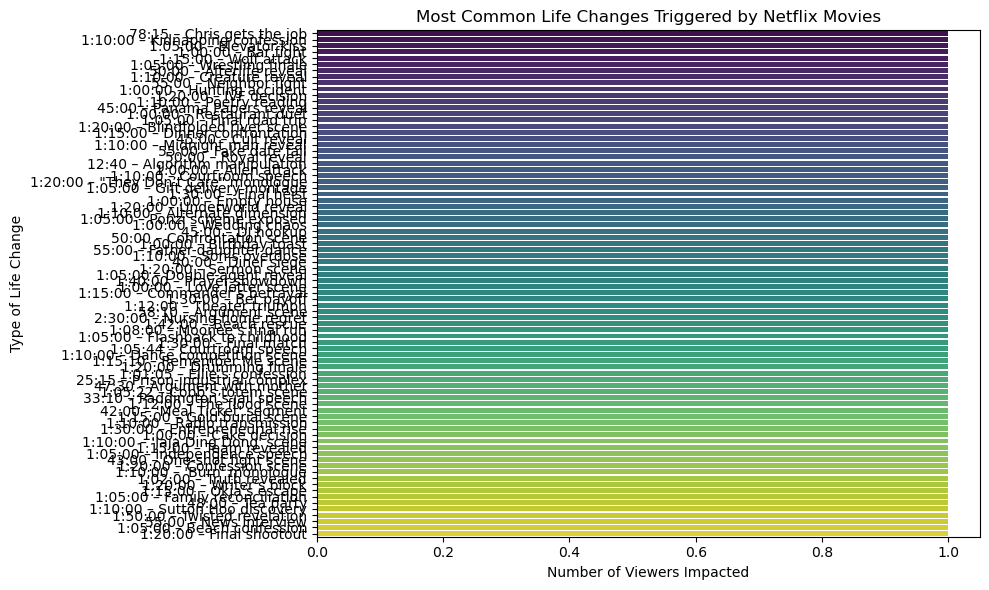

In [ ]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Group by Life Change Type
life_change_counts = df['minute_of_life-changing_insight'].value_counts()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=life_change_counts.values, y=life_change_counts.index, palette="viridis")
plt.title("Most Common Life Changes Triggered by Netflix Movies")
plt.xlabel("Number of Viewers Impacted")
plt.ylabel("Type of Life Change")
plt.tight_layout()
plt.show()

In [ ]:
def extract_time(text):
    if isinstance(text, str) and '–' in text:
        return text.split('–')[0].strip()
    return None

df['Insight Time Raw'] = df['minute_of_life-changing_insight'].apply(extract_time)

# Step 2: Convert mm:ss or hh:mm to total minutes
def convert_to_minutes(time_str):
    try:
        if time_str and ':' in time_str:
            parts = list(map(int, time_str.strip().split(':')))
            if len(parts) == 2:
                minutes, seconds = parts
                return minutes + seconds / 60
            elif len(parts) == 3:
                hours, minutes, seconds = parts
                return hours * 60 + minutes + seconds / 60
    except:
        return None

df['Insight Minute'] = df['Insight Time Raw'].apply(convert_to_minutes)


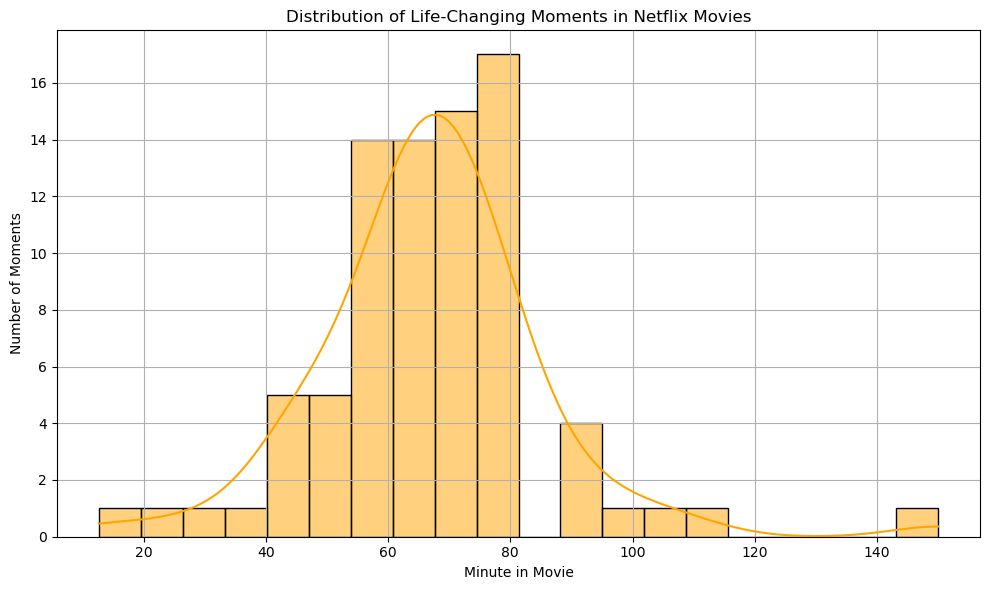

In [ ]:
insight_minutes = df['Insight Minute'].dropna()

plt.figure(figsize=(10,6))
sns.histplot(insight_minutes, bins=20, kde=True, color='orange')
plt.title('Distribution of Life-Changing Moments in Netflix Movies')
plt.xlabel('Minute in Movie')
plt.ylabel('Number of Moments')
plt.grid(True)
plt.tight_layout()
plt.show()

In [5]:
import sys
print(sys.executable)

c:\ProgramData\anaconda3\python.exe


In [8]:
from wordcloud import WordCloud

In [6]:
import sys
!{sys.executable} -m pip install wordcloud


Defaulting to user installation because normal site-packages is not writeable
  Using cached wordcloud-1.9.4-cp312-cp312-win_amd64.whl.metadata (3.5 kB)
Using cached wordcloud-1.9.4-cp312-cp312-win_amd64.whl (301 kB)


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [3]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

# Load data
#df = pd.read_csv('/mnt/data/Netflix Life Impact Dataset (NLID).csv')

# Combine all responses into a single text block
impact_text = ' '.join(df['Meaningful Advice Taken'].dropna().astype(str))

# Generate Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='plasma').generate(impact_text)

# Display
plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Streaming Inspiration: How Netflix Movies Influence Real Lives')
plt.tight_layout()
plt.show()

NameError: name 'df' is not defined

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

# Load data
#df = pd.read_csv('/mnt/data/Netflix Life Impact Dataset (NLID).csv')

# Combine all responses into a single text block
impact_text = ' '.join(df['Meaningful Advice Taken'].dropna().astype(str))

# Generate Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='plasma').generate(impact_text)

# Display
plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Streaming Inspiration: How Netflix Movies Influence Real Lives')
plt.tight_layout()
plt.show()

In [ ]:
import plotly.graph_objects as go

# Prepare grouped data: Movie ➝ Life Change Type
sankey_data = df.groupby(['movie_title', 'life_change_type']).size().reset_index(name='count')

# Unique labels for Sankey nodes
all_movies = sankey_data['movie_title'].unique().tolist()
all_changes = sankey_data['life_change_type'].unique().tolist()
labels = all_movies + all_changes

# Create mapping to node indices
label_map = {label: idx for idx, label in enumerate(labels)}

# Prepare source, target, and value lists
sources = sankey_data['movie_title'].map(label_map).tolist()
targets = sankey_data['life_change_type'].map(label_map).tolist()
values = sankey_data['count'].tolist()

# Create Sankey diagram
fig = go.Figure(data=[go.Sankey(
    node=dict(pad=15, thickness=20, line=dict(color="black", width=0.5), label=labels),
    link=dict(source=sources, target=targets, value=values)
)])

fig.update_layout(title_text="Life Changes Triggered by Netflix Movies", font_size=12)
fig.show()

KeyError: 'life_change_type'

In [ ]:
df.describe()

,Release Year,Average Rating,Number of Reviews
count,82.000000,82.000000,82.000000
mean,2018.304878,7.547561,23146.341463
std,2.365853,1.097160,12796.722141
min,2006.000000,4.000000,8000.000000
25%,2017.250000,6.925000,13000.000000
50%,2019.000000,7.800000,19000.000000
75%,2020.000000,8.300000,31000.000000
max,2021.000000,9.400000,65000.000000


In [ ]:
df.isnull().sum()


Movie Title                            0
Genre                                  0
Release Year                           0
Average Rating                         0
Number of Reviews                      0
Review Highlights                      0
Minute of Life-Changing Insight        0
How Discovered                         0
Meaningful Advice Taken                0
Suggested to Friends/Family (Y/N %)    0
dtype: int64

In [ ]:
df.columns

Index(['Movie Title', 'Genre', 'Release Year', 'Average Rating',
       'Number of Reviews', 'Review Highlights',
       'Minute of Life-Changing Insight', 'How Discovered',
       'Meaningful Advice Taken', 'Suggested to Friends/Family (Y/N %)'],
      dtype='object')

Average Rating distribution: How highly rated are these impactful movies?

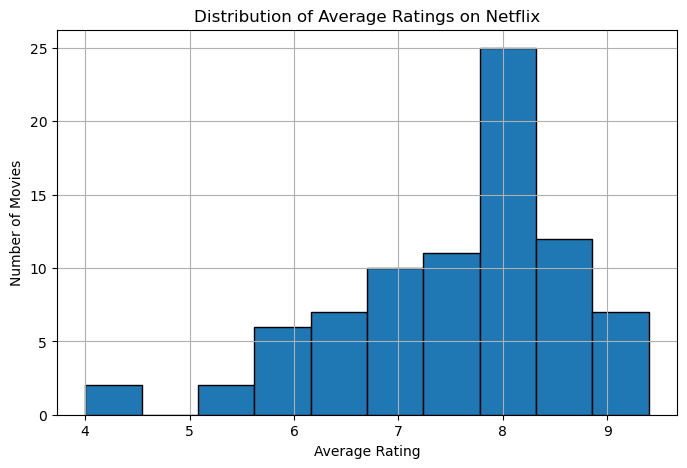

In [ ]:
df['Average Rating'].plot(kind='hist', bins=10, edgecolor='black', figsize=(8, 5))
plt.title('Distribution of Average Ratings on Netflix')
plt.xlabel('Average Rating')
plt.ylabel('Number of Movies')
plt.grid(True)
plt.show()

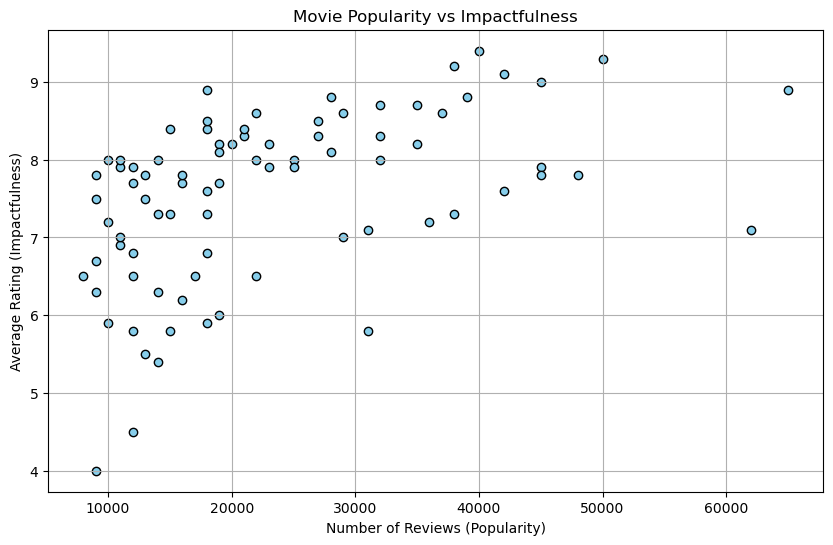

In [ ]:
# Scatter plot: Number of Reviews vs Average Rating
plt.figure(figsize=(10, 6))
plt.scatter(df['Number of Reviews'], df['Average Rating'], color='skyblue', edgecolor='black')

plt.title('Movie Popularity vs Impactfulness')
plt.xlabel('Number of Reviews (Popularity)')
plt.ylabel('Average Rating (Impactfulness)')
plt.grid(True)


In [ ]:
top_movies = df.sort_values(by='Number of Reviews', ascending=False).head(5)
for i in range(len(top_movies)):
    plt.text(top_movies['Number of Reviews'].iloc[i], 
             top_movies['Average Rating'].iloc[i], 
             top_movies['Movie Title'].iloc[i], 
             fontsize=8)

plt.show()

ValueError: Image size of 32240165x3489 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 640x480 with 1 Axes>

C:\Users\VIDYA\AppData\Local\Temp\ipykernel_9820\4268075071.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Average Rating', y='Movie Title', data=top_rated, palette='viridis')


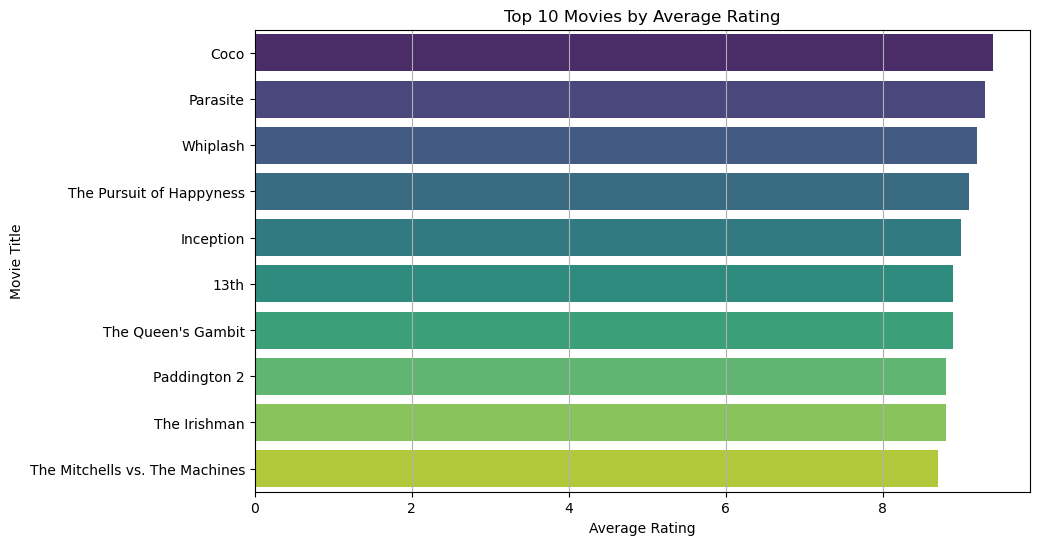

In [ ]:
# Sort by Average Rating and plot
top_rated = df.sort_values(by='Average Rating', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='Average Rating', y='Movie Title', data=top_rated, palette='viridis')
plt.title('Top 10 Movies by Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Movie Title')
plt.grid(axis='x')
plt.show()

C:\Users\VIDYA\AppData\Local\Temp\ipykernel_9820\3352870916.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Number of Reviews', y='Movie Title', data=top_reviewed, palette='magma')


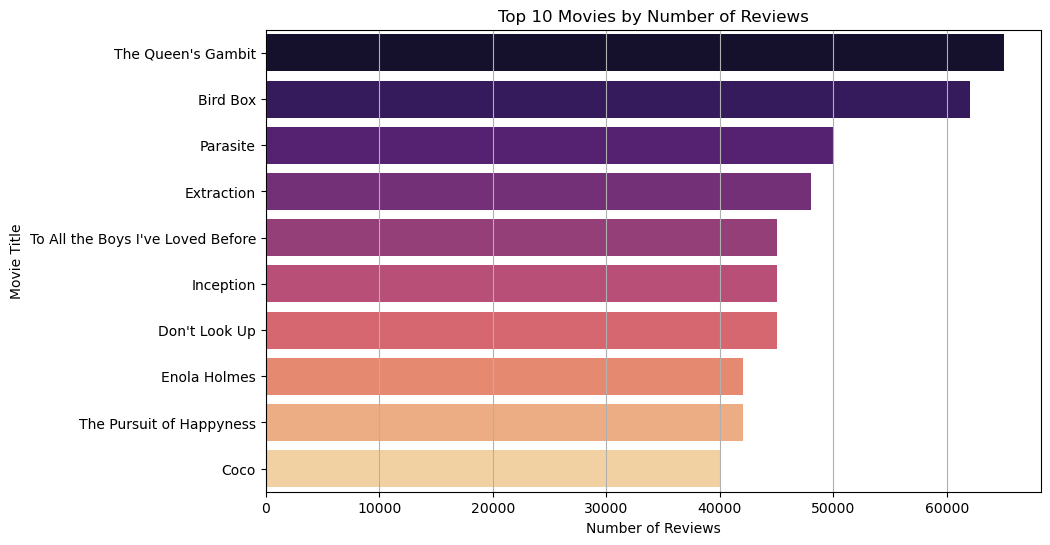

In [ ]:
# Sort by Number of Reviews and plot
top_reviewed = df.sort_values(by='Number of Reviews', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='Number of Reviews', y='Movie Title', data=top_reviewed, palette='magma')
plt.title('Top 10 Movies by Number of Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('Movie Title')
plt.grid(axis='x')
plt.show()

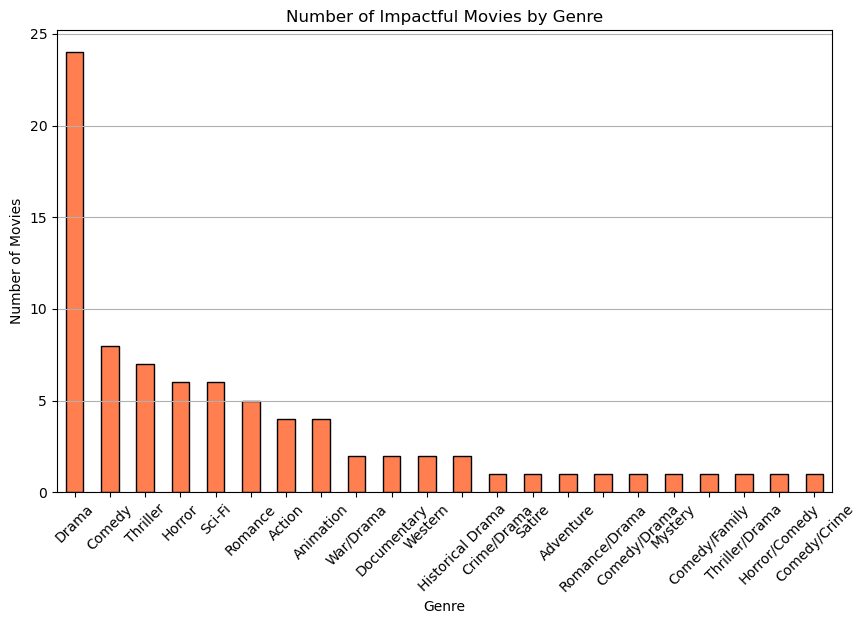

In [ ]:
# Count the number of movies by Genre
genre_counts = df['Genre'].value_counts()

# Plot
genre_counts.plot(kind='bar', figsize=(10, 6), color='coral', edgecolor='black')
plt.title('Number of Impactful Movies by Genre')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import re

# Extract the minute part from 'Minute of Life-Changing Insight'
def extract_minute(time_text):
    match = re.match(r'(\d+):(\d+)', str(time_text))
    if match:
        minutes = int(match.group(1))
        seconds = int(match.group(2))
        return minutes + seconds/60  # Convert to decimal minutes
    return None

df['Life_Changing_Minute'] = df['Minute of Life-Changing Insight'].apply(extract_minute)

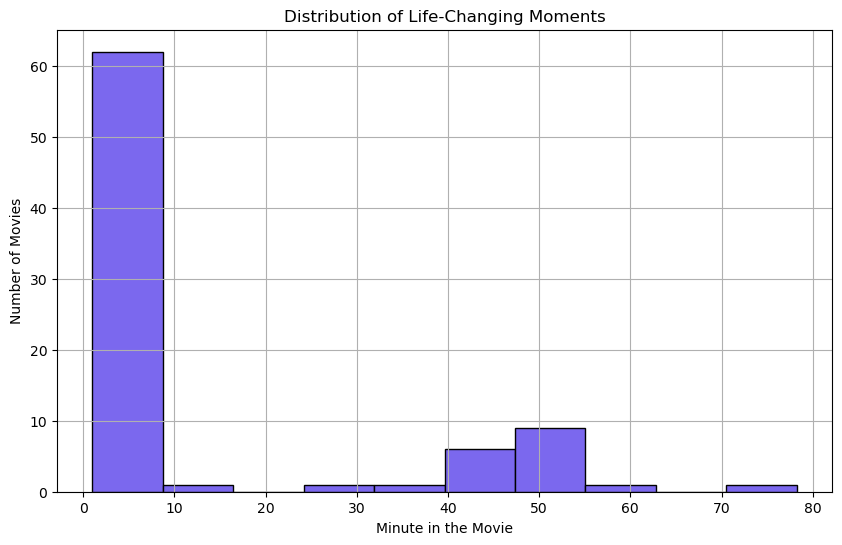

In [ ]:
# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(df['Life_Changing_Minute'].dropna(), bins=10, color='mediumslateblue', edgecolor='black')
plt.title('Distribution of Life-Changing Moments')
plt.xlabel('Minute in the Movie')
plt.ylabel('Number of Movies')
plt.grid(True)
plt.show()

In [ ]:
import re

# Function to extract minute
def extract_minute(time_text):
    match = re.match(r'(\d+):(\d+)', str(time_text))
    if match:
        minutes = int(match.group(1))
        seconds = int(match.group(2))
        return minutes + seconds/60
    return None

# Create new column
df['Life_Changing_Minute'] = df['Minute of Life-Changing Insight'].apply(extract_minute)

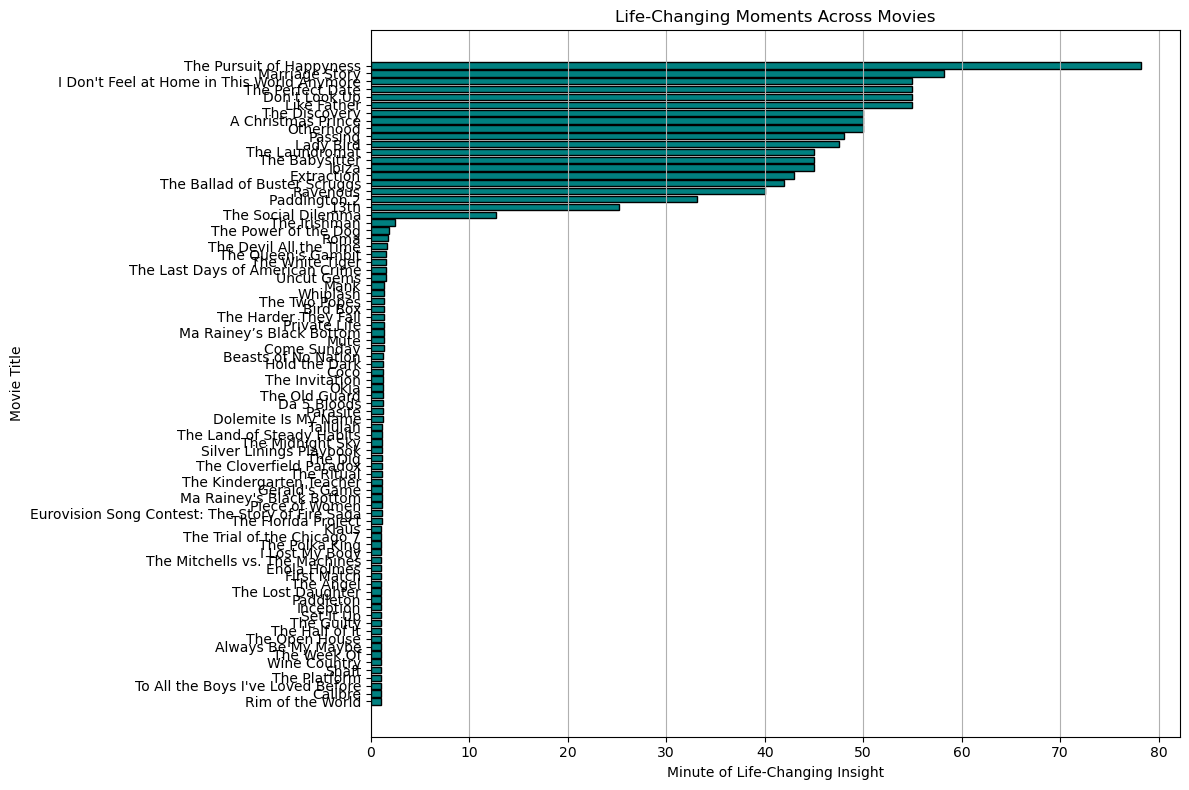

In [ ]:
# Sort movies by life-changing moment (optional, makes it cleaner)
df_sorted = df.sort_values('Life_Changing_Minute')

# Plot
plt.figure(figsize=(12, 8))
plt.barh(df_sorted['Movie Title'], df_sorted['Life_Changing_Minute'], color='teal', edgecolor='black')
plt.title('Life-Changing Moments Across Movies')
plt.xlabel('Minute of Life-Changing Insight')
plt.ylabel('Movie Title')
plt.grid(axis='x')
plt.tight_layout()
plt.show()

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all advice into a single text
all_advice_text = ' '.join(df['Meaningful Advice Taken'].dropna())

# Generate WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(all_advice_text)

# Plot WordCloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Meaningful Advice')
plt.show()


ModuleNotFoundError: No module named 'wordcloud'

In [ ]:
df.columns

Index(['Movie Title', 'Genre', 'Release Year', 'Average Rating',
       'Number of Reviews', 'Review Highlights',
       'Minute of Life-Changing Insight', 'How Discovered',
       'Meaningful Advice Taken', 'Suggested to Friends/Family (Y/N %)',
       'Life_Changing_Minute'],
      dtype='object')

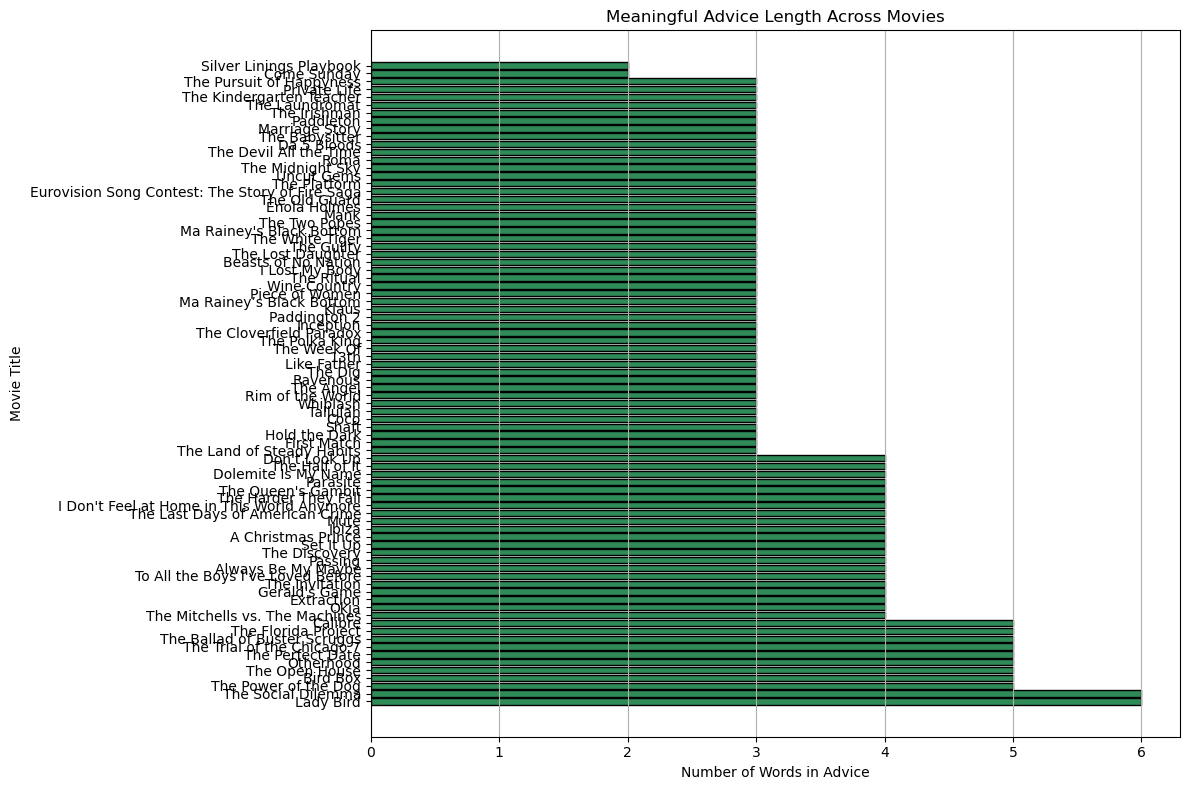

In [ ]:
# Create a new column for the length of the advice (word count)
df['Advice_Length'] = df['Meaningful Advice Taken'].dropna().apply(lambda x: len(x.split()))

# Sort by length (optional for better looking graph)
df_sorted = df.sort_values('Advice_Length', ascending=False)

# Plot
plt.figure(figsize=(12, 8))
plt.barh(df_sorted['Movie Title'], df_sorted['Advice_Length'], color='seagreen', edgecolor='black')
plt.title('Meaningful Advice Length Across Movies')
plt.xlabel('Number of Words in Advice')
plt.ylabel('Movie Title')
plt.grid(axis='x')
plt.tight_layout()
plt.show()

Bar Chart: Genre vs. Number of Impactful Movies 

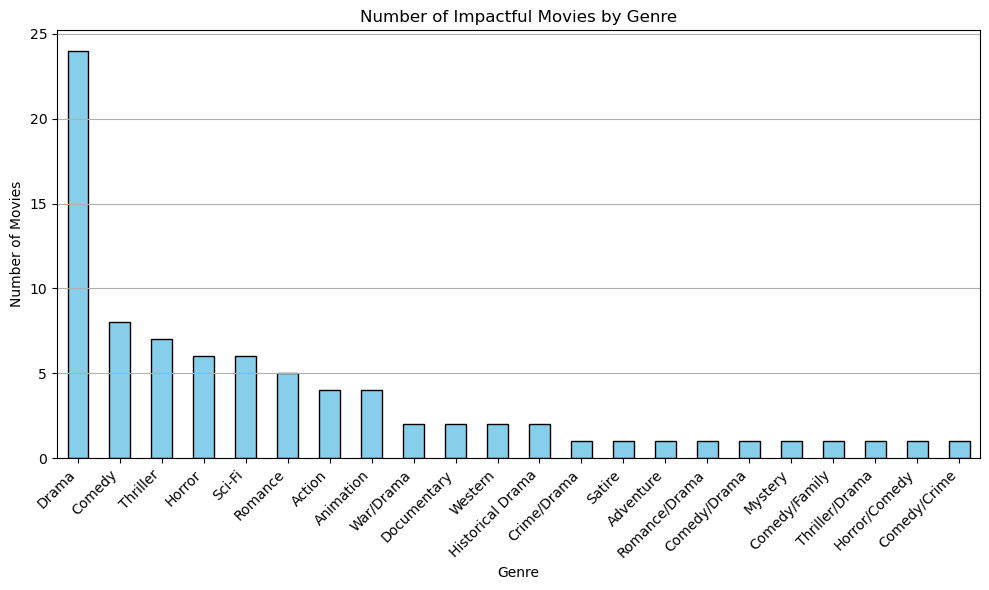

In [ ]:
genre_counts = df['Genre'].value_counts()

# Plot
plt.figure(figsize=(10, 6))
genre_counts.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Number of Impactful Movies by Genre')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Horizontal Bar Chart: Movie Title vs. Advice Length 

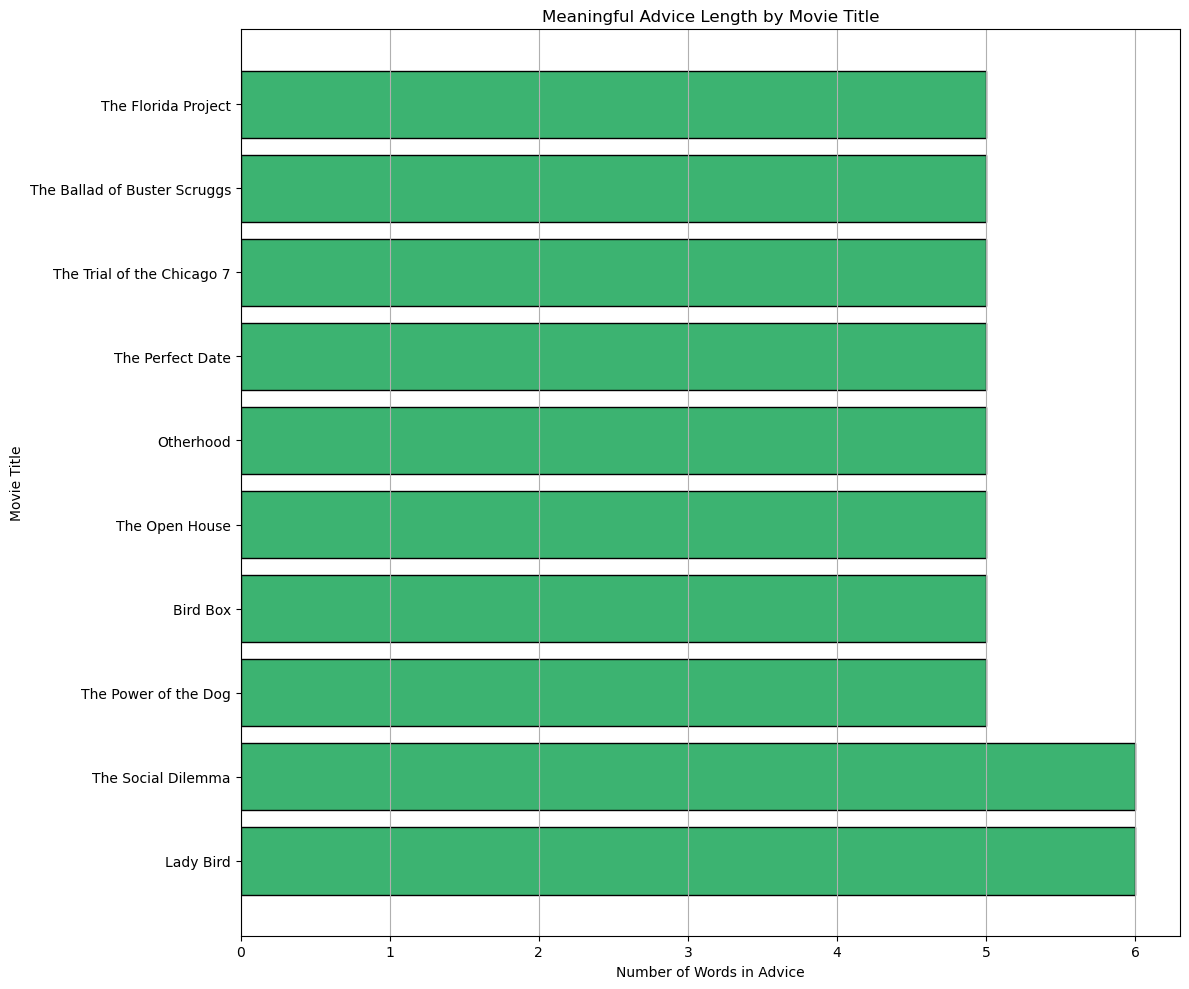

In [ ]:
df['Advice_Length'] = df['Meaningful Advice Taken'].dropna().apply(lambda x: len(x.split()))
# df_advice_sorted = df_advice.sort_values(by='Advice_Length', ascending=False).head(50)
# Drop rows where advice is missing
df_advice = df.dropna(subset=['Meaningful Advice Taken'])

# Sort by Advice Length for better visualization
df_advice_sorted = df_advice.sort_values(by='Advice_Length', ascending=False).head(10)

# Plot
plt.figure(figsize=(12, 10))
plt.barh(df_advice_sorted['Movie Title'], df_advice_sorted['Advice_Length'], color='mediumseagreen', edgecolor='black')

plt.title('Meaningful Advice Length by Movie Title')
plt.xlabel('Number of Words in Advice')
plt.ylabel('Movie Title')
plt.grid(axis='x')
plt.tight_layout()
plt.show()


In [ ]:
df_advice_sorted = df_advice.sort_values(by='Advice_Length', ascending=False).head(50)
plt.show()

In [ ]:
discovery_counts = df['Discovery_Source'].value_counts() 

ax = discovery_counts.plot(kind='bar', figsize=(10,6), color='skyblue')
ax.set_title('How Viewers Discover Netflix Movies', fontsize=16)
ax.set_xlabel('Discovery Source', fontsize=14)
ax.set_ylabel('Number of Viewers', fontsize=14)
ax.grid(axis='y')

KeyError: 'Discovery_Source'

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(df['Average_Rating'], df['Recommendation_Behavior'], alpha=0.6, color='teal')
plt.title('Average Rating vs. Recommendation Behavior', fontsize=16)
plt.xlabel('Average Rating', fontsize=14)
plt.ylabel('Recommendation Behavior', fontsize=14)
plt.grid(True)
plt.show()

KeyError: 'Average_Rating'

<Figure size 800x600 with 0 Axes>

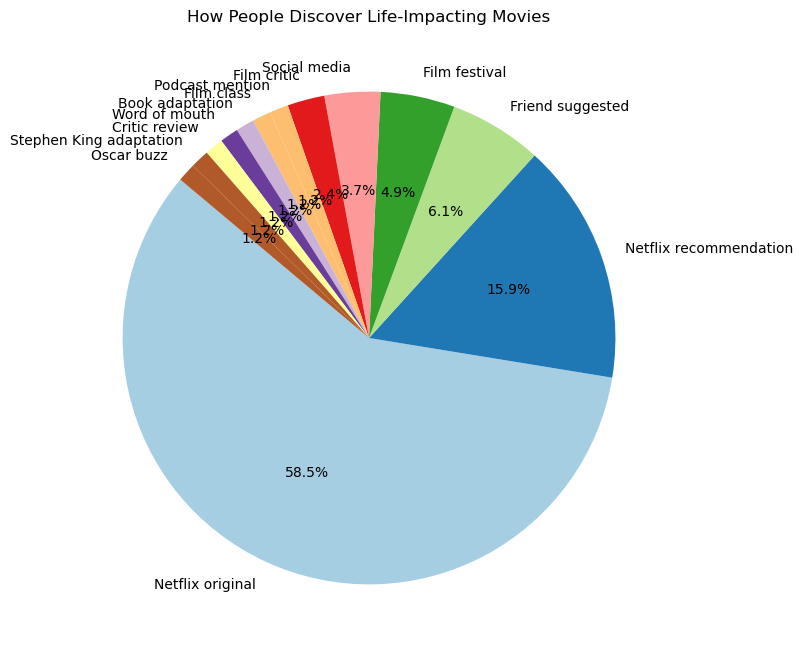

In [ ]:
# Count discovery methods
discovery_counts = df['How Discovered'].value_counts()

# Plot pie chart
discovery_counts.plot.pie(
    figsize=(8, 8),
    autopct='%1.1f%%',
    startangle=140,
    colormap='Paired',
    title='How People Discover Life-Impacting Movies'
)
plt.ylabel('')  # Hide y-axis label
plt.show()

In [ ]:
df_copy = df.copy()

# Extract numeric recommendation percentage
df_copy['Recommendation %'] = df_copy['Suggested to Friends/Family (Y/N %)'].str.extract(r'(\d+)%').astype(float)

# Sort by Recommendation % and take top 10
top10 = df_copy.sort_values('Recommendation %', ascending=False).head(10)

# Plot bar chart
top10.plot.bar(
    x='Movie Title',
    y='Recommendation %',
    figsize=(12, 6),
    color='crimson',
    title='Top 10 Movies with Highest Recommendation %'
)
plt.ylabel('Recommendation Percentage')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

NameError: name 'df' is not defined